In [51]:
import tensorflow as tf
from tensorflow.keras import  datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [52]:
(X_train,Y_train),(X_test,Y_test) = datasets.mnist.load_data()

In [53]:
X_train=X_train/255.0
X_test=X_test/255.0

In [54]:
X_train.reshape(-1,28,28,1)
X_test.reshape(-1,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [55]:
cnn=models.Sequential([
  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),

  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10,activation='softmax')
])

In [56]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [57]:
cnn.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8592 - loss: 0.4471 - val_accuracy: 0.9838 - val_loss: 0.0519
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9760 - loss: 0.0843 - val_accuracy: 0.9884 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9825 - loss: 0.0581 - val_accuracy: 0.9918 - val_loss: 0.0254
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0436 - val_accuracy: 0.9916 - val_loss: 0.0262
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9916 - val_loss: 0.0262


In [58]:
test_loss,test_acc=cnn.evaluate(X_test,Y_test)
print(f"\n🔹 Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9894 - loss: 0.0342

🔹 Test Accuracy: 0.9916


In [59]:
def predict_image(image_path):
  try:
    print(f"Opening image: {image_path}")
    img=Image.open(image_path)
    print("Image opened successfully")
    img=img.convert("L")
    print("Image converted to Grayscale")
    img=img.resize((28,28))
    print("Image resized to 28x28")
    img_array=np.array(img)
    print(f"Image converted to Numpy array: {img_array.shape}")
    img_array=img_array/255.0
    print("Image normalized")
    img_array = img_array.reshape(1, 28, 28, 1)
    print(f"Image reshaped for model input: {img_array.shape}")

    img_array = img_array.astype(np.float32)

    prediction=cnn.predict(img_array)
    predicted_class=np.argmax(prediction)

    plt.figure(figsize=(4,4))
    plt.imshow(img,cmap="gray")
    plt.xlabel(f"Predicted : {predicted_class}",fontsize=14)
    plt.show()

  except Exception as e:
    print(f"Error processing image: {e}")


Opening image: /content/digit1.jpeg
Image opened successfully
Image converted to Grayscale
Image resized to 28x28
Image converted to Numpy array: (28, 28)
Image normalized
Image reshaped for model input: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


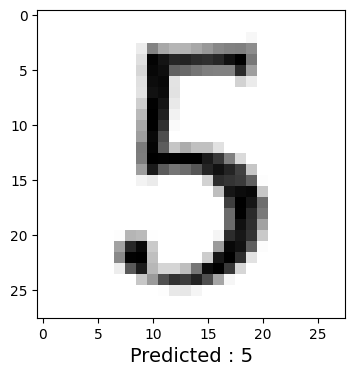

In [61]:
image_path="/content/digit1.jpeg"
predict_image(image_path)